# RAG (Retrieval Augmented Generation)

* 자연어 처리(NLP) 분야의 혁신적인 기술로, 기존 모델의 한계를 넘어서 정보 검색과 생성을 통합하는 방법론
* 풍부한 정보를 담고 있는 대규모 문서 데이터베이스에서 관련정보를 검색하고, 이를 통해 언어 모델이 더 정확하고 상세한 답변을 생성 할 수 있게한다.

## RAG의 프로세스

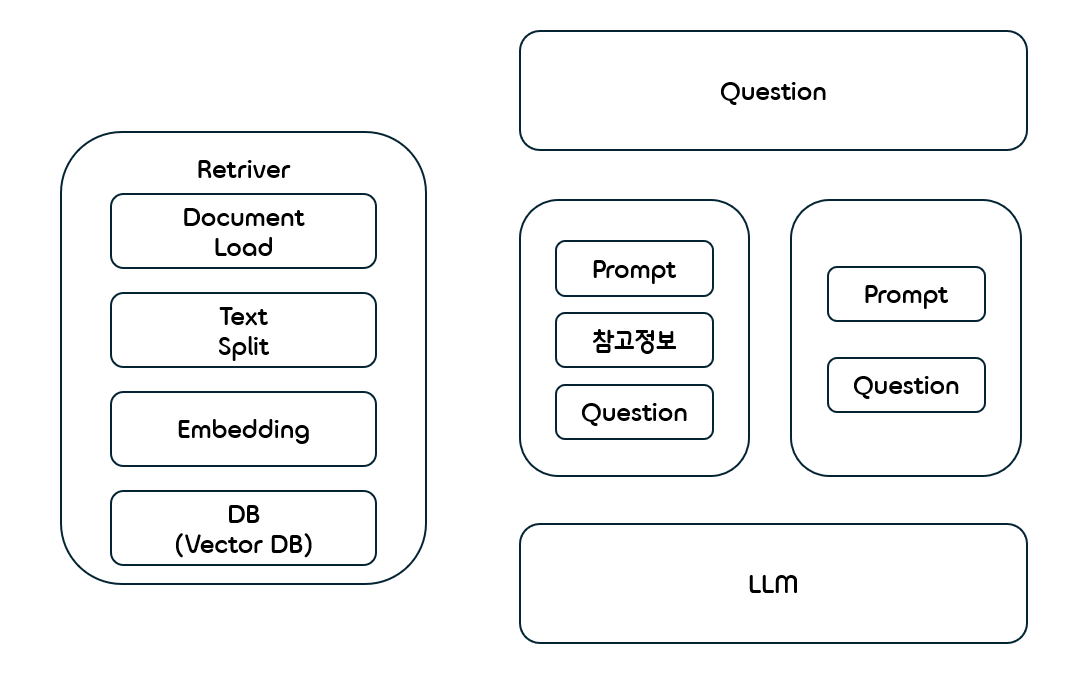

### 1. 사전 준비단계

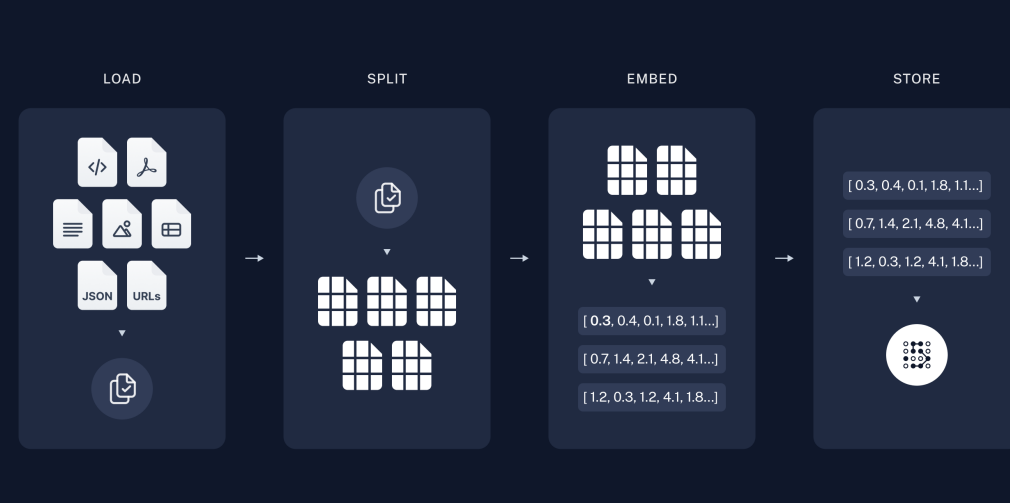





**도큐먼트로드**
* 외부의 데이터 소스에서 필요한 문서를 로드하고 초기 처리를 한다. <br>
https://python.langchain.com/v0.1/docs/modules/data_connection/document_loaders/


1. 데이터 소스 선택
* 어디서 데이터를 가지고 올것인지, 수집을 할것인지 정보 자체를 모으는 과정

2. 데이터 수집
* 데이터 소스에서 피요한 데이터를 수집하는 작업  

3. 데이터 필터링과 전처리
* 수집한 데이터에서 RAG 시스템에 필요한 정보만을 추출하는 작업

4. 데이터 로드
* RAG 시스템 내부적으로 사용할 수 있는 형식으로 변환

**텍스트분할**
* 로드된 문서를 처리가능한 작은 단위 (chunk)로 분할한다.

* RAG시스템에서 로드된 문서를 효율적으로 처리하기위해 작은 규모의 조각으로 나눈 작업
* 이단계의 목적은 LLM이 받아들일 수 있는 효율적인 작은 규모의 조각으로 나누어,
    사용자가 입력한 질문에 대해 보다 효율적으로 선별해 가져오기 위함.

**문서분할의 장점**
* 정확성의 향상 : 질문에 연관된 정보만 가져와 LLM에 전달하므로 응답결과의 품질이 높아진다.
* 리소스 최적화 : 모든 문서를 LLM에 전달하면 비용이 많이 발생하고, 답변에 많은 정보를 참조하게 됨으로써 할루시네이션이 발생 할 수 있음.

**문서분할과정**
1. 문서 구조 파악
2. 단위 선정
3. 단위 크기 선정
4. 청크 오버랩 : 분할된 끝부분에서 맥락이 이어질 수 있도록, 일부를 겹쳐서 분할하는 것

**임베딩**
* 각 문서 또는 문서의 일부를 벡터 형태로 변환하여 문서의 의미를 수치화한다.
* 임베딩을 통해 자연어를 컴퓨터가 더 잘 이해하고 처리 할 수 있게 된다.
* 수치화된 벡터 형태로의 변환은 문서간의 유사성을 계산 할 수 있게 해준다.

### 벡터스토어 저장
* 임베딩된 데이터를 저장하는 벡터 데이터베이스에 저장한다.
* 임베딩 벡터들을 효과적으로 저장하고 색인화 함으로써 관련된 정보를 빠르게 검색 할 수 있다.
* 문서를 찾아오는 과정(처리속도)가 전체적인 RAG시스템의 응답시간과 정확성에 큰 영향을 미침

### 2. 런타임 단계

### 검색기(Retriever)
* 질문이 주어지면, 이와 관련된 문서를 벡터 데이터베이스에서 검색한다.

**동작 방식**
1. 질문의 벡터화
2. 벡터 유사성 비교
3. 상위 문서 선정
4. 문서정보 반환

**프롬프트(Prompt)**
* 검색된 정보를 바탕으로 언어 모델을 위한 질문을 구성한다.

**LLM**
* 구성된 프롬프트를 사용해 언어모델이 답변을 생성한다.

**체인생성**
* 이 모든 과정을 하나로 묶어주는 체인을 생성한다.